NFP and ADP Correlation: 0.59


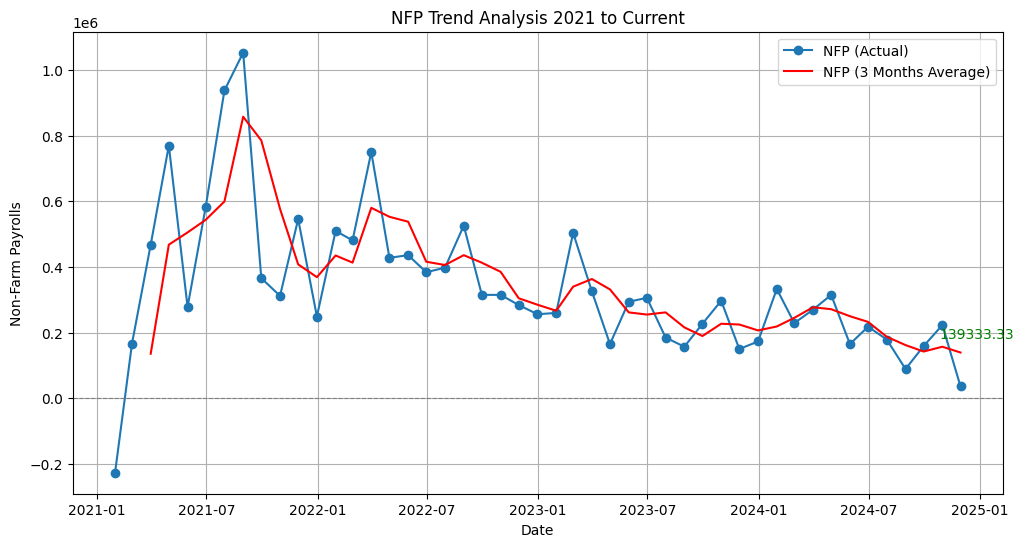

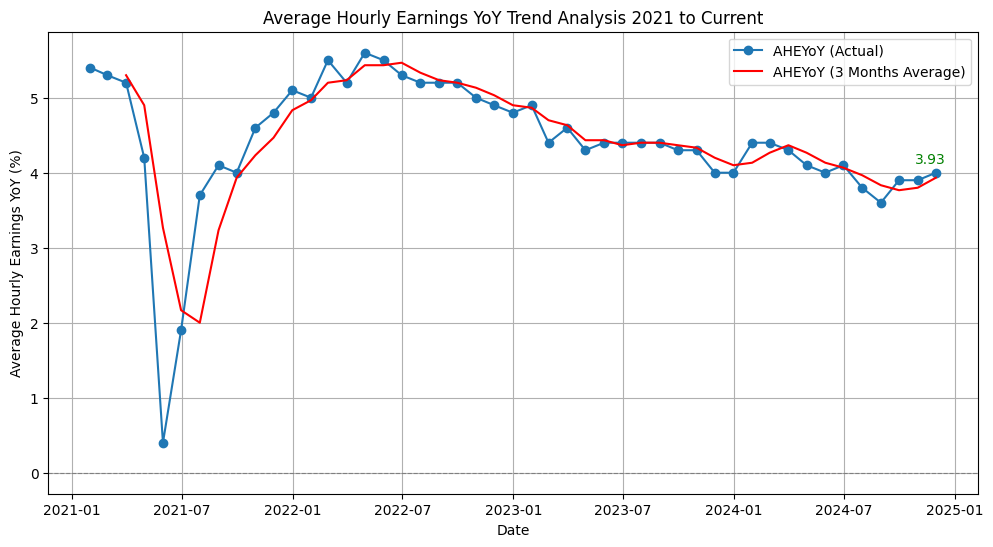

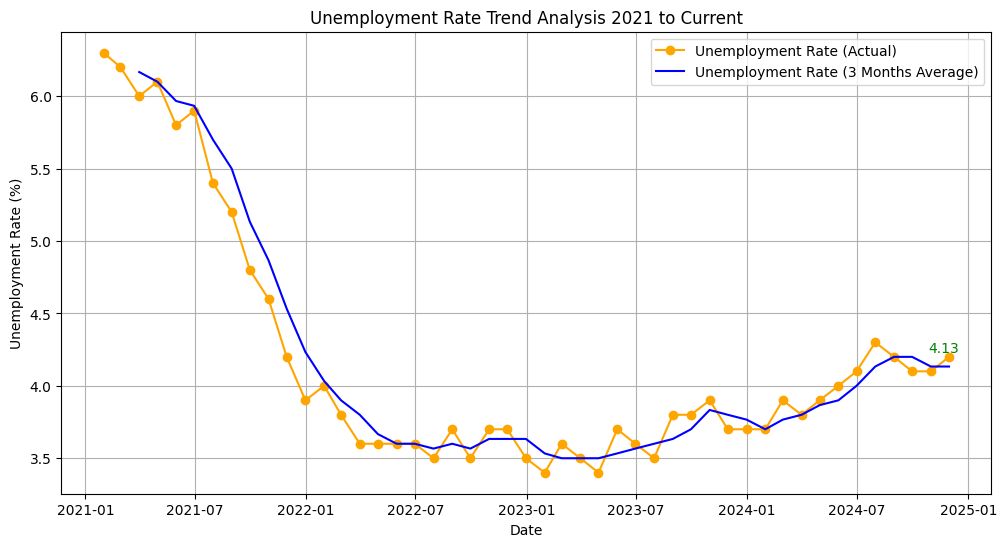

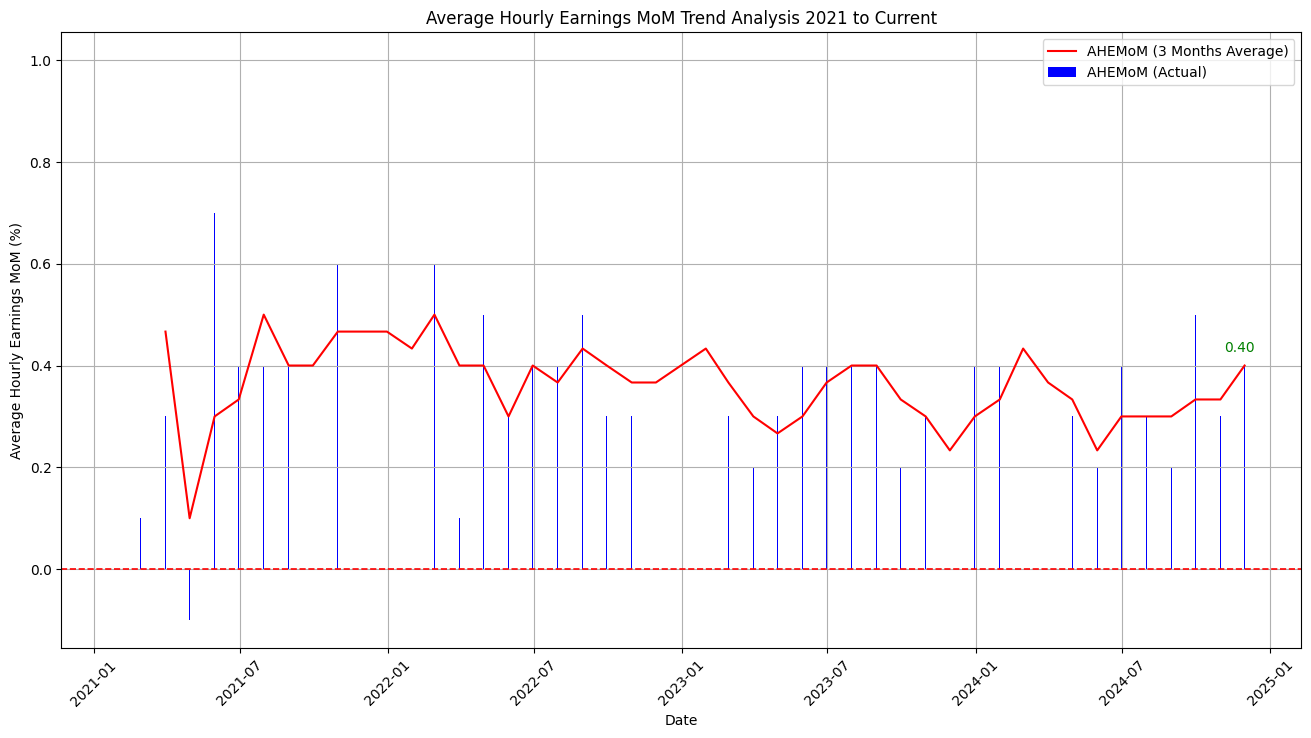

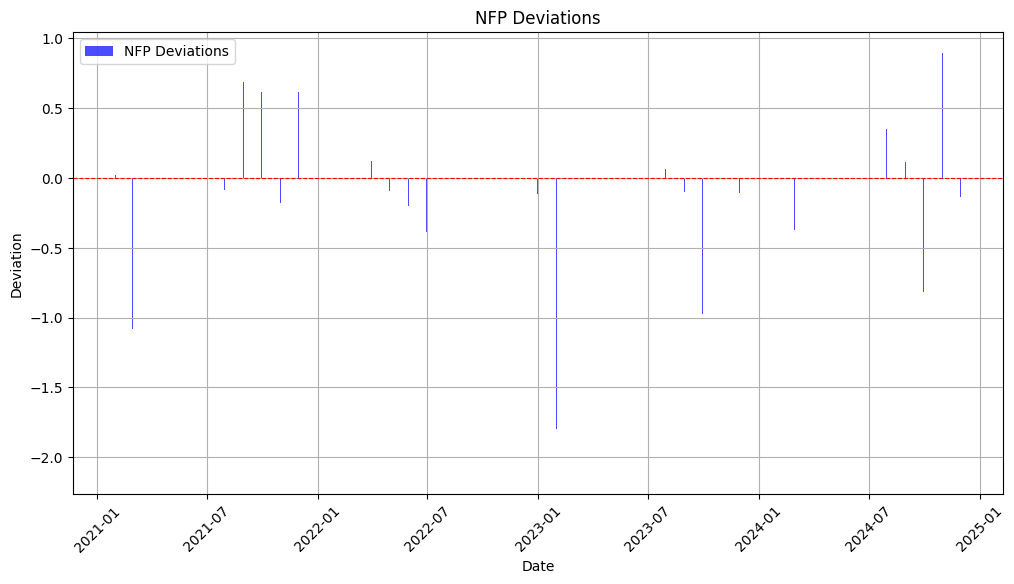

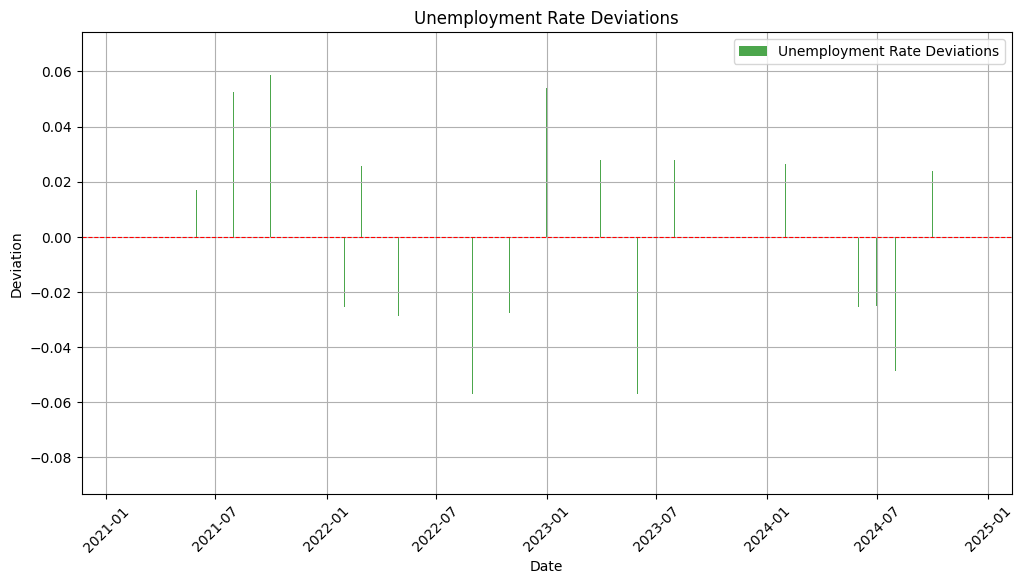

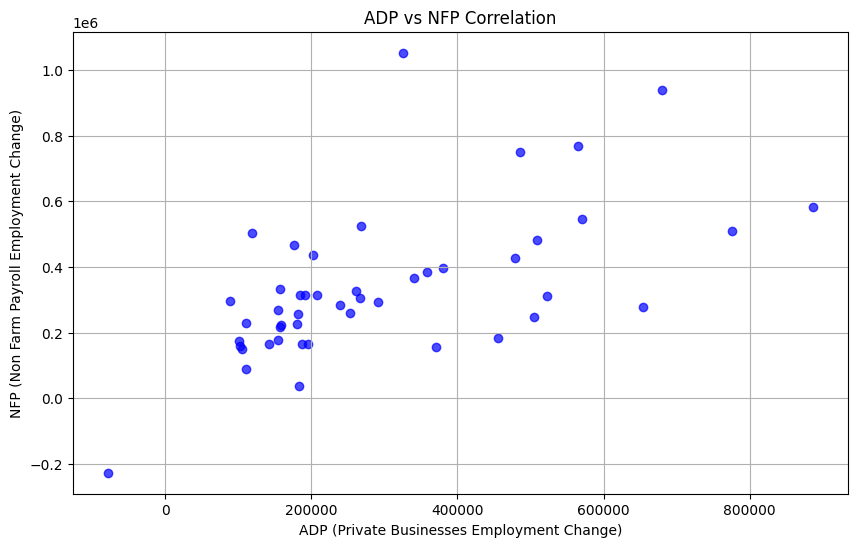

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel dosyasını yükleme
file_path = "MacroIndicators_USA.xlsx"
nfp = pd.read_excel(file_path, sheet_name="NonFarmPayrolls")
unemployment = pd.read_excel(file_path, sheet_name="UnemploymentRate")
adp = pd.read_excel(file_path, sheet_name="ADPEmploymentChange")
aheyoy = pd.read_excel(file_path, sheet_name="AverageHourlyEarningsYoY")
ahemom = pd.read_excel(file_path, sheet_name="AverageHourlyEarningsMoM")

# Hatalı başlık veya veri karışıklığını kaldırma
nfp = nfp[nfp['DATE'] != "DATE"]
unemployment = unemployment[unemployment['DATE'] != "DATE"]
adp = adp[adp['DATE'] != "DATE"]
aheyoy = aheyoy[aheyoy['DATE'] != "DATE"]
ahemom = ahemom[ahemom['DATE'] != "DATE"]

# Tarih sütunlarını datetime formatına çevirme
nfp['DATE'] = pd.to_datetime(nfp['DATE'], errors='coerce')
unemployment['DATE'] = pd.to_datetime(unemployment['DATE'], errors='coerce')
adp['DATE'] = pd.to_datetime(adp['DATE'], errors='coerce')
aheyoy['DATE'] = pd.to_datetime(aheyoy['DATE'], errors='coerce')
ahemom['DATE'] = pd.to_datetime(ahemom['DATE'], errors='coerce')

# Geçerli olmayan tarihleri kaldırma
nfp = nfp.dropna(subset=['DATE'])
unemployment = unemployment.dropna(subset=['DATE'])
adp = adp.dropna(subset=['DATE'])
aheyoy = aheyoy.dropna(subset=['DATE'])
ahemom = ahemom.dropna(subset=['DATE'])

# 3 aylık hareketli ortalama ekleme
nfp = nfp.sort_values('DATE')  # Tarihe göre sıralama
nfp['3_Months_Average'] = nfp['PREVIOUS'].rolling(window=3).mean()

unemployment = unemployment.sort_values('DATE')
unemployment['3_Months_Average'] = unemployment['ACTUAL'].rolling(window=3).mean()

aheyoy = aheyoy.sort_values('DATE')  # Tarihe göre sıralama
aheyoy['3_Months_Average'] = aheyoy['PREVIOUS'].rolling(window=3).mean()

ahemom = ahemom.sort_values('DATE')  # Tarihe göre sıralama
ahemom['3_Months_Average'] = ahemom['PREVIOUS'].rolling(window=3).mean()


# Değer sütunlarını sayısal veriye dönüştürme
nfp['PREVIOUS'] = pd.to_numeric(nfp['PREVIOUS'], errors='coerce')
nfp['DEVIATION'] = pd.to_numeric(nfp['DEVIATION'], errors='coerce')
unemployment['ACTUAL'] = pd.to_numeric(unemployment['ACTUAL'], errors='coerce')
unemployment['DEVIATION'] = pd.to_numeric(unemployment['DEVIATION'], errors='coerce')
adp['PREVIOUS'] = pd.to_numeric(adp['PREVIOUS'], errors='coerce')
aheyoy['PREVIOUS'] = pd.to_numeric(aheyoy['PREVIOUS'], errors='coerce')
aheyoy['DEVIATION'] = pd.to_numeric(aheyoy['DEVIATION'], errors='coerce')
ahemom['PREVIOUS'] = pd.to_numeric(ahemom['PREVIOUS'], errors='coerce')
ahemom['DEVIATION'] = pd.to_numeric(ahemom['DEVIATION'], errors='coerce')


# İki veri setini birleştirme (DATE üzerinden)
merged_data = pd.merge(nfp[['DATE', 'PREVIOUS']], adp[['DATE', 'PREVIOUS']], on='DATE', suffixes=('_NFP', '_ADP'))
# Korelasyon hesaplama
correlation = merged_data['PREVIOUS_NFP'].corr(merged_data['PREVIOUS_ADP'])
print(f"NFP and ADP Correlation: {correlation:.2f}")


# Genel Trend Grafiği: NFP
plt.figure(figsize=(12, 6))
plt.plot(nfp['DATE'], nfp['PREVIOUS'], marker='o', label="NFP (Actual)")
plt.plot(nfp['DATE'], nfp['3_Months_Average'], color='red', label="NFP (3 Months Average)")

# Son 3 Aylık Ortalama Değerini Yazdırma
last_date = nfp['DATE'].iloc[-1]  # Son tarih
last_avg = nfp['3_Months_Average'].iloc[-1]  # Son 3 aylık ortalama
if not pd.isna(last_avg):  # Son değer varsa
    plt.annotate(f"{last_avg:.2f}", (last_date, last_avg), textcoords="offset points", xytext=(-15, 10), fontsize=10, color='green')
    
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title("NFP Trend Analysis 2021 to Current")
plt.xlabel("Date")
plt.ylabel("Non-Farm Payrolls")
plt.legend()
plt.grid()
plt.show()

# Genel Trend Grafiği: aheyoy
plt.figure(figsize=(12, 6))
plt.plot(aheyoy['DATE'], aheyoy['PREVIOUS'], marker='o', label="AHEYoY (Actual)")
plt.plot(aheyoy['DATE'], aheyoy['3_Months_Average'], color='red', label="AHEYoY (3 Months Average)")

# Son 3 Aylık Ortalama Değerini Yazdırma
last_date = aheyoy['DATE'].iloc[-1]  # Son tarih
last_avg = aheyoy['3_Months_Average'].iloc[-1]  # Son 3 aylık ortalama
if not pd.isna(last_avg):  # Son değer varsa
    plt.annotate(f"{last_avg:.2f}", (last_date, last_avg), textcoords="offset points", xytext=(-15, 10), fontsize=10, color='green')
    
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title("Average Hourly Earnings YoY Trend Analysis 2021 to Current")
plt.xlabel("Date")
plt.ylabel("Average Hourly Earnings YoY (%)")
plt.legend()
plt.grid()
plt.show()

# Genel Trend Grafiği: İşsizlik Oranı
plt.figure(figsize=(12, 6))
plt.plot(unemployment['DATE'], unemployment['ACTUAL'], marker='o', color='orange', label="Unemployment Rate (Actual)")
plt.plot(unemployment['DATE'], unemployment['3_Months_Average'], color='blue', label="Unemployment Rate (3 Months Average)")

# Son 3 Aylık Ortalama Değerini Yazdırma
last_date = unemployment['DATE'].iloc[-1]  # Son tarih
last_avg = unemployment['3_Months_Average'].iloc[-1]  # Son 3 aylık ortalama
if not pd.isna(last_avg):  # Son değer varsa
    plt.annotate(f"{last_avg:.2f}", (last_date, last_avg), textcoords="offset points", xytext=(-15, 10), fontsize=10, color='green')

plt.title("Unemployment Rate Trend Analysis 2021 to Current")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.grid()
plt.show()

# MoM Çubuk Grafiği
plt.figure(figsize=(16, 8))
plt.bar(ahemom['DATE'], ahemom['PREVIOUS'], color='blue', alpha=1, label="AHEMoM (Actual)")
plt.plot(ahemom['DATE'], ahemom['3_Months_Average'], color='red', label="AHEMoM (3 Months Average)")
# Son 3 Aylık Ortalama Değerini Yazdırma
last_date = ahemom['DATE'].iloc[-1]  # Son tarih
last_avg = ahemom['3_Months_Average'].iloc[-1]  # Son 3 aylık ortalama
if not pd.isna(last_avg):  # Son değer varsa
    plt.annotate(f"{last_avg:.2f}", (last_date, last_avg), textcoords="offset points", xytext=(-15, 10), fontsize=10, color='green')
    
plt.axhline(0, color='red', linestyle='--', linewidth=1.2)  # Nötr çizgi
plt.title("Average Hourly Earnings MoM Trend Analysis 2021 to Current")
plt.xlabel("Date")
plt.ylabel("Average Hourly Earnings MoM (%)")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

# NFP Tahmin Sapması Grafiği
plt.figure(figsize=(12, 6))
plt.bar(nfp['DATE'], nfp['DEVIATION'], color='blue', alpha=0.7, label="NFP Deviations")
plt.axhline(0, color='red', linestyle='--', linewidth=0.8)
plt.title("NFP Deviations")
plt.xlabel("Date")
plt.ylabel("Deviation")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

# İşsizlik Oranı Tahmin Sapması Grafiği
plt.figure(figsize=(12, 6))
plt.bar(unemployment['DATE'], unemployment['DEVIATION'], color='green', alpha=0.7, label="Unemployment Rate Deviations")
plt.axhline(0, color='red', linestyle='--', linewidth=0.8)
plt.title("Unemployment Rate Deviations")
plt.xlabel("Date")
plt.ylabel("Deviation")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()


# Korelasyon grafiği (scatter plot)
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['PREVIOUS_ADP'], merged_data['PREVIOUS_NFP'], alpha=0.7, color='blue')
plt.title("ADP vs NFP Correlation")
plt.xlabel("ADP (Private Businesses Employment Change)")
plt.ylabel("NFP (Non Farm Payroll Employment Change)")
plt.grid()
plt.show()
